<a href="https://colab.research.google.com/github/KOK37/Project1/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# +) 끊김방지 (90분/12시간)
F12 -> 개발자 콘솔
function ConnectButton(){
    console.log("끊김방지"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}
setInterval(ConnectButton,60000);

#데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [3]:
!pip install scikit-learn==0.24.2
!pip install pandas-profiling==2.11.0 --upgrade
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [5]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [6]:
movies = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/movies10_22.csv')

In [7]:
df = movies.copy()

# 생략 (전처리 전)

In [28]:
original = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/KOBIS_개봉일람.csv')

In [29]:
original.head(3)

,순번,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
0,1,명량,김한민,(주)빅스톤픽쳐스,NaN,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,"1,587","135,748,398,910","17,613,682","33,121,225,810","4,163,666",사극,15세이상관람가,일반영화
1,2,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,"1,978","139,647,979,516","16,264,944","31,858,660,536","3,638,287",코미디,15세이상관람가,일반영화
2,3,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",NaN,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,개봉영화,장편,한국,"1,912","115,698,654,137","14,410,754","27,530,825,087","3,346,172",판타지,12세이상관람가,일반영화


In [30]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16692 entries, 0 to 16691
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   순번       16692 non-null  int64 
 1   영화명      16692 non-null  object
 2   감독       15471 non-null  object
 3   제작사      5467 non-null   object
 4   수입사      9830 non-null   object
 5   배급사      16676 non-null  object
 6   개봉일      16692 non-null  object
 7   영화유형     16692 non-null  object
 8   영화형태     16691 non-null  object
 9   국적       16692 non-null  object
 10  전국 스크린수  16692 non-null  object
 11  전국 매출액   16692 non-null  object
 12  전국 관객수   16692 non-null  object
 13  서울 매출액   16679 non-null  object
 14  서울 관객수   16692 non-null  object
 15  장르       16621 non-null  object
 16  등급       16691 non-null  object
 17  영화구분     16692 non-null  object
dtypes: int64(1), object(17)
memory usage: 2.3+ MB


In [31]:
original.describe(include='object')

,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
count,16692,15471,5467,9830,16676,16692,16692,16691,16692,16692,16692,16692,16679,16692,16621,16691,16692
unique,16450,6819,1620,544,1037,2668,1,3,68,1051,7383,5858,6844,5139,21,12,2
top,카르멘,버드맨 텟페이,(주)영화사가을,(주)도키엔터테인먼트,(주)도키엔터테인먼트,2017-12-07,개봉영화,장편,한국,1,"6,000",1,0,0,멜로/로맨스,청소년관람불가,일반영화
freq,8,123,728,1505,1512,32,16692,16634,5456,8467,3075,5911,6847,6860,4743,9557,12168


In [32]:
df = original.copy()

#생략 (데이터 전처리)

##drop (순번/제작사/수입사)

In [33]:
#순번 : 의미 없음
df = df.drop(['순번'], axis = 1)
#제작사, 수입사 : 결측치 너무 많음
df = df.drop(['제작사', '수입사'], axis = 1)

In [34]:
df.head(3)

,영화명,감독,배급사,개봉일,영화유형,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
0,명량,김한민,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,"1,587","135,748,398,910","17,613,682","33,121,225,810","4,163,666",사극,15세이상관람가,일반영화
1,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,"1,978","139,647,979,516","16,264,944","31,858,660,536","3,638,287",코미디,15세이상관람가,일반영화
2,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,개봉영화,장편,한국,"1,912","115,698,654,137","14,410,754","27,530,825,087","3,346,172",판타지,12세이상관람가,일반영화


In [35]:
#영화유형 : ?
df['영화유형'].value_counts()

개봉영화    16692
Name: 영화유형, dtype: int64

In [36]:
df = df.drop(['영화유형'], axis = 1)

##replace (영화구분/등급)



In [37]:
df['영화구분'].value_counts()

일반영화       12168
독립/예술영화     4524
Name: 영화구분, dtype: int64

In [38]:
def replace_영화구분(x) :
  x = str(x)
  if '일반영화' in x :
    return '일반'
  elif '독립/예술영화' in x :
    return '독립'
  else :
    return x

In [39]:
df['영화구분'] = df['영화구분'].apply(replace_영화구분)

In [40]:
df['영화구분'].value_counts()

일반    12168
독립     4524
Name: 영화구분, dtype: int64

In [41]:
df['등급'].value_counts()

청소년관람불가              9557
15세이상관람가             3565
12세이상관람가             1923
전체관람가                1634
15세관람가                  3
청소년관람불가,15세이상관람가        2
12세이상관람가,전체관람가          2
12세관람가                  1
12세이상관람가,15세이상관람가       1
15세이상관람가,전체관람가          1
연소자관람불가,청소년관람불가         1
15세관람가,12세이상관람가         1
Name: 등급, dtype: int64

In [42]:
def replace_등급(x) :
  x = str(x)
  if '청소년관람불가' in x :
    return '청소년관람불가'
  elif '15세' in x :
    return '15세이상관람가'
  elif '12세' in x :
    return '12세이상관람가'
  else :
    return x

In [43]:
df['등급'] = df['등급'].apply(replace_등급)

In [44]:
df['등급'].value_counts()

청소년관람불가     9560
15세이상관람가    3571
12세이상관람가    1926
전체관람가       1634
nan            1
Name: 등급, dtype: int64

In [45]:
df.loc[df['등급'] == 'nan']

,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
9297,내가 먼저 깃발 꽂은 예비 신부,이진선,(주)샤이커뮤니케이션즈,2022-10-20,장편,한국,1,"100,000",20,"100,000",20,성인물(에로),nan,일반


In [46]:
df['등급'] = df['등급'].str.replace('nan', '청소년관람불가')

In [47]:
df['등급'].value_counts()

청소년관람불가     9561
15세이상관람가    3571
12세이상관람가    1926
전체관람가       1634
Name: 등급, dtype: int64

In [48]:
df['등급'].value_counts(normalize=True)

청소년관람불가     0.572789
15세이상관람가    0.213935
12세이상관람가    0.115385
전체관람가       0.097891
Name: 등급, dtype: float64

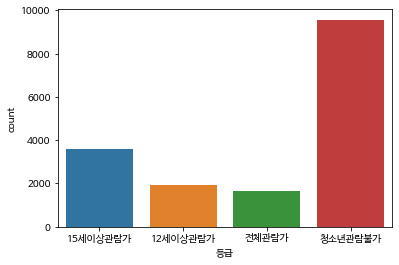

In [49]:
sns.countplot(data=df, x='등급')
plt.show()

In [50]:
pd.set_option('display.max_row', 100)

In [51]:
df.groupby('등급')['장르'].value_counts()

등급        장르      
12세이상관람가  드라마          644
          액션           297
          다큐멘터리        166
          코미디          154
          멜로/로맨스       136
          애니메이션        129
          공연            71
          SF            68
          판타지           54
          어드벤처          43
          공포(호러)        23
          미스터리          22
          전쟁            21
          뮤지컬           20
          사극            18
          가족            17
          기타            16
          범죄            13
          스릴러           10
          서부극(웨스턴)       2
15세이상관람가  드라마          842
          액션           825
          공포(호러)       326
          코미디          300
          스릴러          232
          멜로/로맨스       176
          범죄           168
          SF           137
          미스터리         123
          다큐멘터리         89
          애니메이션         84
          전쟁            73
          판타지           67
          어드벤처          36
          공연            22
          기타            20
         

In [52]:
pd.set_option('display.max_row', 20)

##결측치 및 타입 변환 (영화형태/매출액/스크린수/개봉일)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16692 entries, 0 to 16691
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   영화명      16692 non-null  object
 1   감독       15471 non-null  object
 2   배급사      16676 non-null  object
 3   개봉일      16692 non-null  object
 4   영화형태     16691 non-null  object
 5   국적       16692 non-null  object
 6   전국 스크린수  16692 non-null  object
 7   전국 매출액   16692 non-null  object
 8   전국 관객수   16692 non-null  object
 9   서울 매출액   16679 non-null  object
 10  서울 관객수   16692 non-null  object
 11  장르       16621 non-null  object
 12  등급       16692 non-null  object
 13  영화구분     16692 non-null  object
dtypes: object(14)
memory usage: 1.8+ MB


In [54]:
data_null = df[df['영화형태'].isnull() | df['서울 매출액'].isnull()]
data_null

,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
5315,기타가 웃는다,전소현,(주)자우엔터테인먼트,2011-11-17,장편,한국,2,"8,467,000","1,222",NaN,0,드라마,12세이상관람가,독립
7261,비기닝,자비에 지아놀리,판씨네마(주),2011-10-27,장편,프랑스,1,"973,000",139,NaN,0,드라마,15세이상관람가,독립
7824,S 중독,카모가와 테츠로,(유)조이앤컨텐츠그룹,2012-05-18,NaN,일본,1,"350,050",75,"350,050",75,성인물(에로),청소년관람불가,일반
7888,플래닛 51,"호르헤 블랑코,마르코스 마르티네즈,자비에르 아바드",(주)쇼박스,2010-10-21,장편,스페인,67,"431,000",67,NaN,0,애니메이션,전체관람가,일반
7891,실락원,모리타 요시미츠,에이원엔터테인먼트,2011-07-28,장편,일본,1,"408,000",65,NaN,0,드라마,청소년관람불가,독립
8445,가져선 안될 비밀,알란 볼,판씨네마(주),2011-11-03,장편,미국,1,"462,000",56,NaN,0,드라마,청소년관람불가,일반
8446,노라 없는 5일,마리아나 체닐로,프리비젼엔터테인먼트,2010-10-21,장편,멕시코,9,"280,000",56,NaN,0,드라마,15세이상관람가,독립
8728,돈 조반니,카를로스 사우라,(주)디지탈케이아이엔,2010-10-14,장편,이탈리아,16,"300,000",53,NaN,0,드라마,15세이상관람가,독립
8982,춤추는 동물원,"김효정,박성용",㈜인디스토리,2010-12-02,장편,한국,5,"221,000",37,NaN,0,드라마,15세이상관람가,독립
9238,고질라 - 파이널 워즈,기타무라 류헤이,씨네힐,2011-12-07,장편,일본,1,"120,000",20,NaN,0,액션,전체관람가,일반


In [55]:
df['영화형태'] = df['영화형태'].fillna('장편')

In [56]:
df['서울 매출액'] = df['서울 매출액'].fillna('0')

In [57]:
df['서울 관객수'] = df['서울 관객수'].str.replace(',', '')
df['서울 관객수'] = df['서울 관객수'].astype(int) 
df['서울 매출액'] = df['서울 매출액'].str.replace(',', '')
df['서울 매출액'] = df['서울 매출액'].astype(int)  

In [58]:
df['전국 관객수'] = df['전국 관객수'].str.replace(',', '')
df['전국 관객수'] = df['전국 관객수'].astype(int) 
df['전국 매출액'] = df['전국 매출액'].str.replace(',', '')
df['전국 매출액'] = df['전국 매출액'].astype(int)

In [59]:
df['전국 스크린수'] = df['전국 스크린수'].str.replace(',', '')
df['전국 스크린수'] = df['전국 스크린수'].astype(int)

In [60]:
best20 = df.sort_values(ascending=False, by = '전국 관객수').head(20)

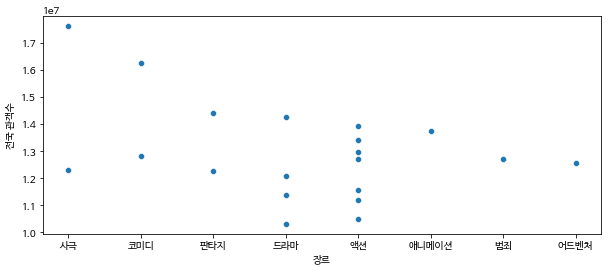

In [61]:
plt.figure(figsize=[10, 4])
sns.scatterplot(data=best20, x='장르', y = '전국 관객수')

In [62]:
best100 = df.sort_values(ascending = False, by = '전국 관객수').head(100)

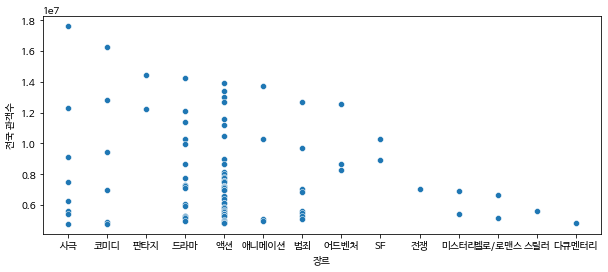

In [63]:
plt.figure(figsize=[10, 4])
sns.scatterplot(data=best100, x='장르', y = '전국 관객수')

In [64]:
df.groupby('장르').mean().round(2).sort_values('전국 매출액', ascending=False)

,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수
장르,,,,,
사극,694.13,1.852681e+10,2386238.40,4.726326e+09,590657.22
어드벤처,305.79,5.190322e+09,621995.43,1.477667e+09,168340.64
범죄,250.35,4.023147e+09,487094.77,1.025640e+09,121144.79
액션,202.96,3.476933e+09,415250.03,9.938731e+08,113559.54
판타지,166.13,2.474280e+09,305058.85,6.530671e+08,77732.52
...,...,...,...,...,...
서부극(웨스턴),30.08,1.454676e+08,20096.00,7.029034e+07,9351.31
멜로/로맨스,16.30,1.226648e+08,15944.04,3.938514e+07,4922.38
공연,16.22,6.820194e+07,4535.68,3.252855e+07,1980.18


In [65]:
df['연도'] = df.개봉일.astype(str).str[:-6]
df['연도'] = df['연도'].astype(int) 
df['월'] = df.개봉일.astype(str).str[5:-3]
df['월'] = df['월'].astype(int) 
df[['개봉일', '연도', '월']].sample(3)

,개봉일,연도,월
3834,2017-11-23,2017,11
2233,2018-12-13,2018,12
16382,2018-07-08,2018,7


In [66]:
df = df.drop(['개봉일'], axis = 1)

In [67]:
df['연도'].describe()

count    16692.000000
mean      2017.553379
std          3.027478
min       2010.000000
25%       2015.000000
50%       2018.000000
75%       2020.000000
max       2022.000000
Name: 연도, dtype: float64

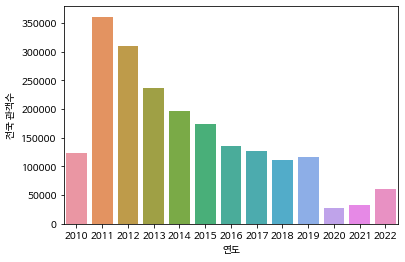

In [68]:
sns.barplot(data=df, x='연도', y='전국 관객수', ci=None)
plt.show()

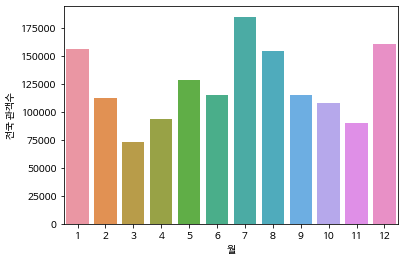

In [69]:
sns.barplot(data=df, x='월', y='전국 관객수', ci=None)
plt.show()

##수치,더미화 (감독/배급사/장르/국적)
> 상위 20그룹과 기타 `or` 점수제 ?



In [70]:
df['배급사'].value_counts()

(주)도키엔터테인먼트                  1512
(주)영진크리에이티브                  1489
(주)영화사가을                      728
(주)케이알씨지                      629
(주)소나무픽쳐스                     570
                             ... 
주식회사 온 피크,(주)머스트씨무비릴리징컴퍼니       1
케이비에스미디어(주),주식회사 마운틴픽쳐스         1
(주)미로스페이스,THE 픽쳐스               1
(주)엣나인필름,(주)메타플레이               1
주식회사 게티스버그컴퍼니                   1
Name: 배급사, Length: 1037, dtype: int64

In [71]:
#배급사별 관객수 평균 기준으로 점수 -> 수치화
rank_배급사 = df.groupby('배급사')['전국 관객수'].mean().reset_index(name = '배급사_p').sort_values(by = '배급사_p', ascending=False)
rank_배급사

,배급사,배급사_p
866,"월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아(주)",9585874.0
291,"(주)씨제이이엔엠,(주)덱스터스튜디오",8252669.0
868,"월트디즈니컴퍼니코리아 유한책임회사,한국소니픽쳐스릴리징브에나비스타영화㈜",7074867.0
1015,"플러스엠 엔터테인먼트,(주)키위미디어그룹",6851297.0
941,"주식회사 에이비오엔터테인먼트,플러스엠 엔터테인먼트",6755951.5
...,...,...
216,(주)빅마운틴컬쳐스,1.0
218,(주)빅콘미디어,1.0
353,(주)영화공간,1.0
551,(주)해머픽쳐스,1.0


In [72]:
df.loc[df['배급사'] == '월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아(주)']

,영화명,감독,배급사,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분,연도,월
18,어벤져스: 에이지 오브 울트론,조스 웨던,"월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아(주)",장편,미국,1843,88582586366,10494499,25001906266,2823388,액션,12세이상관람가,일반,2015,4
28,캡틴 아메리카: 시빌 워,"안소니 루소,조 루소","월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아(주)",장편,미국,1991,72672111827,8677249,21248121149,2400069,액션,12세이상관람가,일반,2016,4


In [73]:
df = pd.merge(df, rank_배급사, how = 'left')

In [74]:
df['감독'].value_counts()

버드맨 텟페이      123
나가에 타카미       90
강정훈           88
강현성           87
토미죠 타로        80
            ... 
김동령,박경태        1
토미나가 마사노리      1
김민근            1
이완 맥그리거        1
레 탄 선          1
Name: 감독, Length: 6819, dtype: int64

In [75]:
#감독별 관객수 평균 기준으로 점수 -> 수치화
rank_감독 = df.groupby('감독')['전국 관객수'].mean().reset_index(name = '감독_p').sort_values(by = '감독_p', ascending=False)
rank_감독

,감독,감독_p
4157,윤제균,1.424600e+07
4291,이상용,1.269302e+07
5818,"크리스 벅,제니퍼 리",1.202195e+07
4283,이상근,9.426051e+06
486,김용화,9.330964e+06
...,...,...
3147,아람 라파포트,1.000000e+00
3166,아르만도 보,1.000000e+00
5954,타노미 소카이도,1.000000e+00
1299,레 탄 선,0.000000e+00


In [76]:
df = pd.merge(df, rank_감독, how = 'left')

In [77]:
df.head(3)

,영화명,감독,배급사,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분,연도,월,배급사_p,감독_p
0,명량,김한민,(주)씨제이이엔엠,장편,한국,1587,135748398910,17613682,33121225810,4163666,사극,15세이상관람가,일반,2014,7,1.722708e+06,8.088772e+06
1,극한직업,이병헌,(주)씨제이이엔엠,장편,한국,1978,139647979516,16264944,31858660536,3638287,코미디,15세이상관람가,일반,2019,1,1.722708e+06,5.124140e+06
2,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,장편,한국,1912,115698654137,14410754,27530825087,3346172,판타지,12세이상관람가,일반,2017,12,9.580224e+05,9.330964e+06


In [78]:
data_null = df[df['배급사_p'].isnull()]
data_null.head(3)

,영화명,감독,배급사,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분,연도,월,배급사_p,감독_p
1510,출국,노규엽,NaN,장편,한국,274,639521850,81722,244385200,32001,드라마,15세이상관람가,독립,2018,11,NaN,81722.0
7472,미라클 문 페스티벌 츠키우타. 버추얼 라이브 2019 사계 딜레이 뷰잉 ~가을 버전~,NaN,NaN,장편,일본,1,3510000,117,3510000,117,애니메이션,전체관람가,일반,2019,12,NaN,NaN
7479,미라클 문 페스티벌 츠키우타. 버추얼 라이브 2019 사계 딜레이 뷰잉 ~겨울 버전~,NaN,NaN,장편,일본,1,3479000,116,3479000,116,애니메이션,전체관람가,일반,2019,12,NaN,NaN


In [79]:
df['배급사_p'] = np.where(pd.notnull(df['배급사_p']) == True, df['배급사_p'], df['전국 관객수'])

In [80]:
df['감독_p'] = np.where(pd.notnull(df['감독_p']) == True, df['감독_p'], df['전국 관객수'])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16692 entries, 0 to 16691
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   영화명      16692 non-null  object 
 1   감독       15471 non-null  object 
 2   배급사      16676 non-null  object 
 3   영화형태     16692 non-null  object 
 4   국적       16692 non-null  object 
 5   전국 스크린수  16692 non-null  int64  
 6   전국 매출액   16692 non-null  int64  
 7   전국 관객수   16692 non-null  int64  
 8   서울 매출액   16692 non-null  int64  
 9   서울 관객수   16692 non-null  int64  
 10  장르       16621 non-null  object 
 11  등급       16692 non-null  object 
 12  영화구분     16692 non-null  object 
 13  연도       16692 non-null  int64  
 14  월        16692 non-null  int64  
 15  배급사_p    16692 non-null  float64
 16  감독_p     16692 non-null  float64
dtypes: float64(2), int64(7), object(8)
memory usage: 2.3+ MB


In [82]:
df.sample(3)

,영화명,감독,배급사,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분,연도,월,배급사_p,감독_p
14827,유혹의 한계,데미언 로메이,(주)티앤엘엔터테인먼트,장편,미국,1,1000,1,0,0,스릴러,15세이상관람가,일반,2022,1,235.750000,1.0
8837,전사 씨야마,프리차 송사쿨,(주)케이알씨지,장편,태국,5,163000,48,12000,5,액션,12세이상관람가,독립,2016,12,238.674086,48.0
4951,울림의 탄생,이정준,영화배급협동조합 씨네소파,장편,한국,7,12174900,1677,2486900,257,다큐멘터리,전체관람가,독립,2021,10,1266.500000,1677.0


In [83]:
df.columns

Index(['영화명', '감독', '배급사', '영화형태', '국적', '전국 스크린수', '전국 매출액', '전국 관객수',
       '서울 매출액', '서울 관객수', '장르', '등급', '영화구분', '연도', '월', '배급사_p', '감독_p'],
      dtype='object')

In [84]:
df = df[['영화명', '감독', '감독_p', '배급사', '배급사_p', '영화형태', '영화구분', '국적', '연도', '월', 
         '장르', '등급', '전국 스크린수', '전국 매출액', '전국 관객수', '서울 매출액', '서울 관객수']]

In [85]:
df['영화형태'].value_counts()

장편      16635
옴니버스       55
단편          2
Name: 영화형태, dtype: int64

In [86]:
df.loc[df['영화형태'] == '옴니버스']

,영화명,감독,감독_p,배급사,배급사_p,영화형태,영화구분,국적,연도,월,장르,등급,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수
745,무서운 이야기 2,"김성호,김휘,정범식,민규동",492465.0,롯데쇼핑㈜롯데엔터테인먼트,958022.373563,옴니버스,일반,한국,2013,6,미스터리,15세이상관람가,337,3375472500,492465,766405500,105175
904,무서운 이야기,"정범식,임대웅,홍지영,김곡,김선,민규동",331760.0,롯데쇼핑㈜롯데엔터테인먼트,958022.373563,옴니버스,일반,한국,2012,7,공포(호러),청소년관람불가,274,2452368566,331760,677799507,87835
1421,인류멸망 보고서,김지운,2137336.5,"롯데쇼핑㈜롯데엔터테인먼트,타임스토리그룹(주)",97555.000000,옴니버스,일반,한국,2012,4,SF,15세이상관람가,236,702418000,97555,228281500,29802
1432,무서운 이야기 3 : 화성에서 온 소녀,"백승빈,김선,김곡,민규동",95415.0,롯데쇼핑㈜롯데엔터테인먼트,958022.373563,옴니버스,일반,한국,2016,6,공포(호러),15세이상관람가,317,764967500,95415,164623500,19541
2043,"메밀꽃, 운수 좋은 날, 그리고 봄봄","안재훈,한혜진",28592.0,이달투,17179.500000,옴니버스,독립,한국,2014,8,애니메이션,전체관람가,37,220210100,33751,96543000,13552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7444,나의 먼 가족,"한소리,이선영,김경범,오세희",121.0,주식회사 씨엠닉스,188.615385,옴니버스,독립,한국,2021,4,기타,12세이상관람가,1,337000,121,0,0
7708,노맨스랜드,"박중하,신지현,김상혁,지화자",84.0,영화사 유일무이,84.000000,옴니버스,독립,한국,2018,7,코미디,15세이상관람가,1,601000,84,0,0
8740,욕망: 신세계,야마시타 노부히로,2933.2,(유)조이앤시네마,695.137931,옴니버스,독립,일본,2022,5,드라마,12세이상관람가,4,172000,52,100000,20
8871,어떤 하루,"정가영,전선호,최진혁",45.0,(주)무빙픽쳐스컴퍼니,20068.666667,옴니버스,독립,한국,2017,6,드라마,15세이상관람가,5,344000,45,197000,21


In [87]:
df['장르'].value_counts().sort_values(ascending=False)

멜로/로맨스      4743
드라마         2867
성인물(에로)     2206
액션          1584
애니메이션        978
            ... 
전쟁           111
가족            73
사극            45
뮤지컬           43
서부극(웨스턴)      13
Name: 장르, Length: 21, dtype: int64

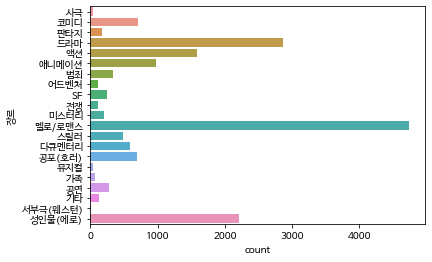

In [88]:
sns.countplot(data=df, y='장르')

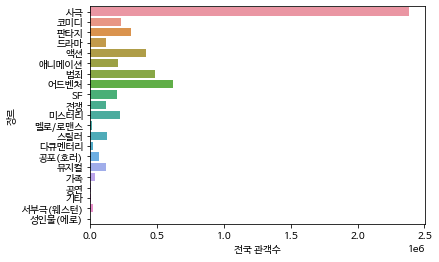

In [89]:
sns.barplot(data=df, y='장르', x='전국 관객수', ci=None)
plt.show()

In [90]:
df.groupby('장르')['전국 관객수'].mean().sort_values(ascending=False)

장르
사극          2.386238e+06
어드벤처        6.219954e+05
범죄          4.870948e+05
액션          4.152500e+05
판타지         3.050589e+05
                ...     
서부극(웨스턴)    2.009600e+04
멜로/로맨스      1.594404e+04
기타          5.618067e+03
공연          4.535679e+03
성인물(에로)     1.420762e+01
Name: 전국 관객수, Length: 21, dtype: float64

In [91]:
top10_장르 = df.groupby('장르')['전국 관객수'].mean().sort_values(ascending=False)[:10]

In [92]:
def func_장르(top10):
  if top10 in top10_장르:
      return top10
  else:
      return '기타'

In [93]:
df['장르'] = df['장르'].apply(func_장르)

In [94]:
df['장르'].value_counts()

기타       11818
액션        1584
애니메이션      978
코미디        705
스릴러        490
범죄         336
SF         252
미스터리       204
판타지        167
어드벤처       113
사극          45
Name: 장르, dtype: int64

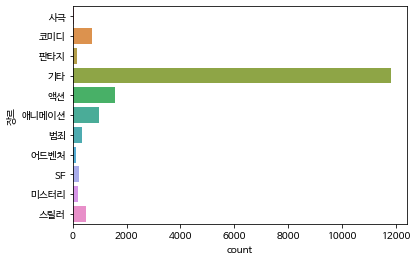

In [95]:
sns.countplot(data=df, y='장르')

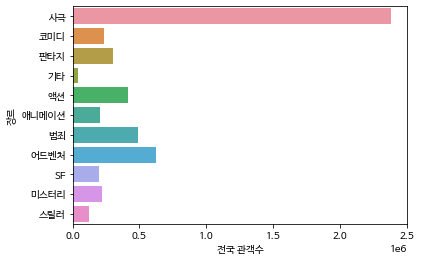

In [96]:
sns.barplot(data=df, y='장르', x='전국 관객수', ci=None)
plt.show()

In [97]:
df['국적'].value_counts()

한국       5456
일본       4957
미국       3044
프랑스       494
영국        490
         ... 
부탄          1
몽고          1
몰타          1
이라크         1
마케도니아       1
Name: 국적, Length: 68, dtype: int64

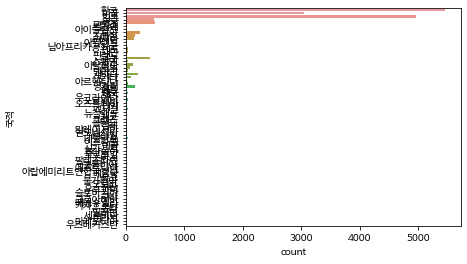

In [98]:
sns.countplot(data=df, y='국적')

In [99]:
df.groupby('국적')['전국 관객수'].mean().sort_values(ascending=False)

국적
미국          282985.253285
한국          203391.002199
벨기에         166326.590909
남아프리카공화국    136233.000000
아이슬란드        70079.333333
                ...      
이라크             47.000000
필리핀             35.666667
세르비아            25.500000
마케도니아            1.000000
우즈베키스탄           1.000000
Name: 전국 관객수, Length: 68, dtype: float64

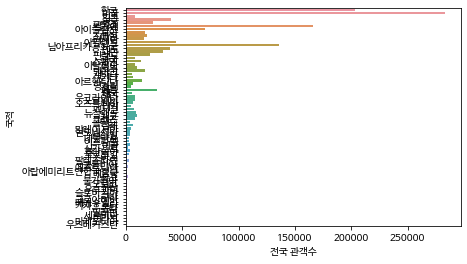

In [100]:
sns.barplot(data=df, y='국적', x='전국 관객수', ci=None)

In [101]:
top5_국적 = df.groupby('국적')['전국 관객수'].mean().sort_values(ascending=False)[:5]

In [102]:
def func_국적(top5):
  if top5 in top5_국적:
      return top5
  else:
      return '기타'

In [103]:
df['국적'] = df['국적'].apply(func_국적)

In [104]:
df['국적'].value_counts()

기타          8154
한국          5456
미국          3044
벨기에           22
아이슬란드         12
남아프리카공화국       4
Name: 국적, dtype: int64

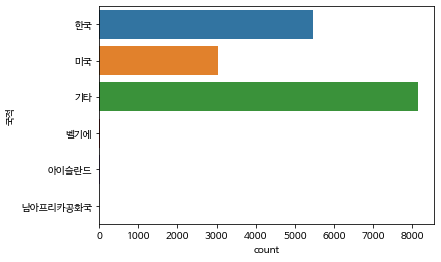

In [105]:
sns.countplot(data=df, y='국적')

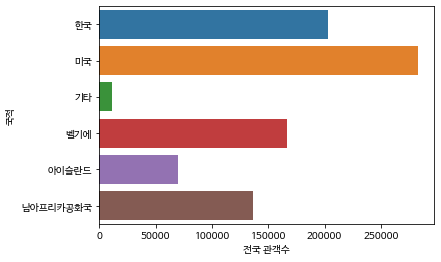

In [106]:
sns.barplot(data=df, y='국적', x='전국 관객수', ci=None)

##추가 전처리 (원핫인코딩)

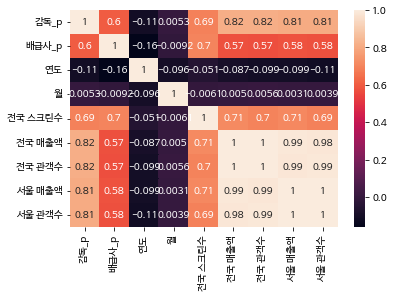

In [107]:
sns.heatmap(df.corr(), annot = True)

In [108]:
df.head(1)

,영화명,감독,감독_p,배급사,배급사_p,영화형태,영화구분,국적,연도,월,장르,등급,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수
0,명량,김한민,8088772.5,(주)씨제이이엔엠,1.722708e+06,장편,일반,한국,2014,7,사극,15세이상관람가,1587,135748398910,17613682,33121225810,4163666


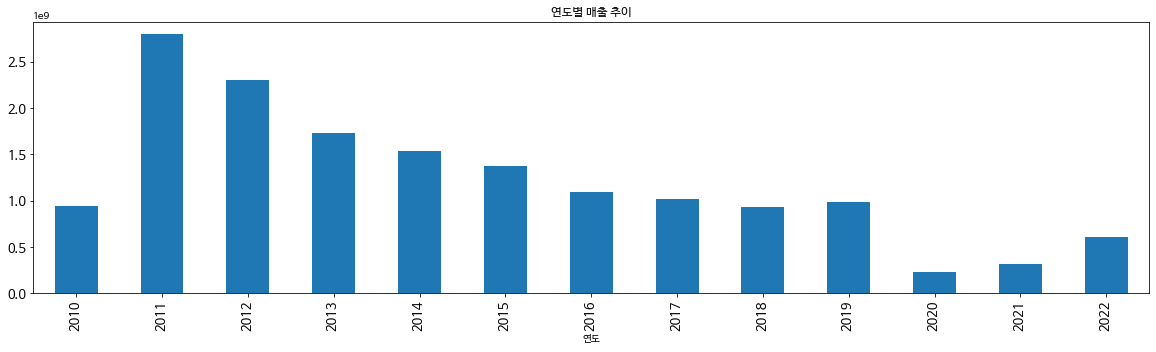

In [118]:
df.groupby(['연도'])['전국 매출액'].mean().plot(kind='bar', 
                                        title='연도별 매출 추이', 
                                        fontsize=13,
                                        figsize=(20,5));

In [131]:
df.head(1)

,영화명,감독,감독_p,배급사,배급사_p,영화형태,영화구분,국적,연도,월,장르,등급,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,가격
0,명량,김한민,8088772.5,(주)씨제이이엔엠,1.722708e+06,장편,일반,한국,2014,7,사극,15세이상관람가,1587,135748398910,17613682,33121225810,4163666,7706.985905


In [138]:
df.groupby(['연도'])['가격'].mean()

연도
2010    7286.463036
2011    7224.686683
2012    7180.090945
2013    6536.090765
2014    6553.634523
2015    7020.658538
2016    7080.139758
2017    6046.941333
2018    5748.849695
2019    5766.055368
2020    6048.657791
2021    5962.730752
2022    6253.802793
Name: 가격, dtype: float64

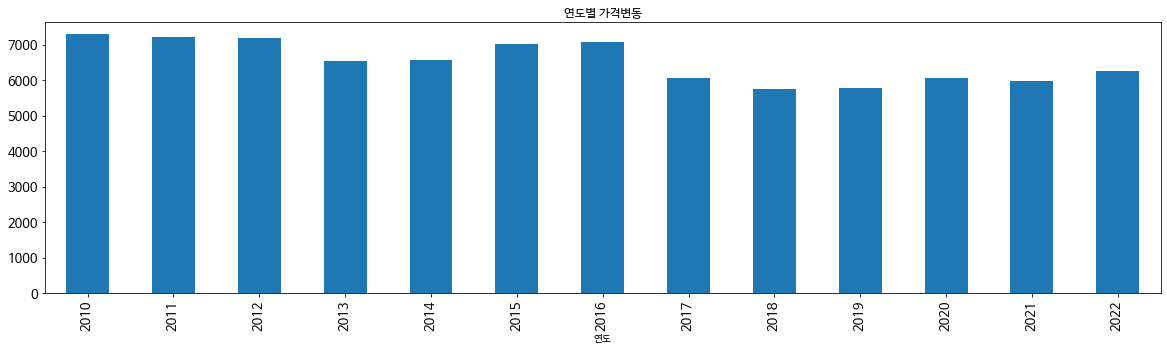

In [137]:
df.groupby(['연도'])['가격'].mean().plot(kind='bar', 
                                        title='연도별 가격변동', 
                                        fontsize=13,
                                        figsize=(20,5));

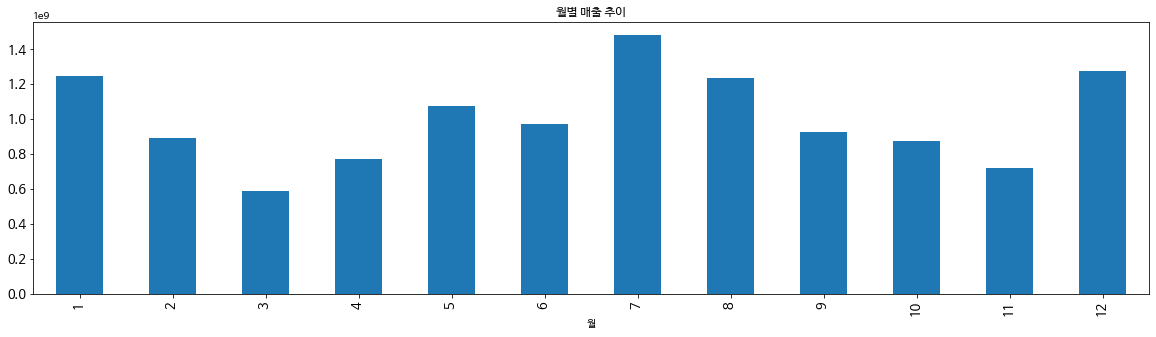

In [119]:
df.groupby(['월'])['전국 매출액'].mean().plot(kind='bar', 
                                        title='월별 매출 추이', 
                                        fontsize=13,
                                        figsize=(20,5));

In [ ]:
from category_encoders import OneHotEncoder

In [ ]:
df.head(1)

,영화명,감독,감독_p,배급사,배급사_p,영화형태,영화구분,국적,연도,월,장르,등급,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수
0,명량,김한민,8088772.5,(주)씨제이이엔엠,1.722708e+06,장편,일반,한국,2014,7,사극,15세이상관람가,1587,135748398910,17613682,33121225810,4163666


In [ ]:
df = df.drop(['영화명', '감독', '배급사'], axis = 1)

In [ ]:
df.head(1)

,감독_p,배급사_p,영화형태,영화구분,국적,연도,월,장르,등급,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수
0,8088772.5,1.722708e+06,장편,일반,한국,2014,7,사극,15세이상관람가,1587,135748398910,17613682,33121225810,4163666


In [ ]:
encoder = OneHotEncoder(use_cat_names = True)
df = encoder.fit_transform(df)

In [ ]:
df.head(1)

,감독_p,배급사_p,영화형태_장편,영화형태_옴니버스,영화형태_단편,영화구분_일반,영화구분_독립,국적_한국,국적_미국,국적_기타,...,장르_스릴러,등급_15세이상관람가,등급_12세이상관람가,등급_전체관람가,등급_청소년관람불가,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수
0,8088772.5,1.722708e+06,1,0,0,1,0,1,0,0,...,0,1,0,0,0,1587,135748398910,17613682,33121225810,4163666


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16692 entries, 0 to 16691
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   감독_p         16692 non-null  float64
 1   배급사_p        16692 non-null  float64
 2   영화형태_장편      16692 non-null  int64  
 3   영화형태_옴니버스    16692 non-null  int64  
 4   영화형태_단편      16692 non-null  int64  
 5   영화구분_일반      16692 non-null  int64  
 6   영화구분_독립      16692 non-null  int64  
 7   국적_한국        16692 non-null  int64  
 8   국적_미국        16692 non-null  int64  
 9   국적_기타        16692 non-null  int64  
 10  국적_벨기에       16692 non-null  int64  
 11  국적_아이슬란드     16692 non-null  int64  
 12  국적_남아프리카공화국  16692 non-null  int64  
 13  연도           16692 non-null  int64  
 14  월            16692 non-null  int64  
 15  장르_사극        16692 non-null  int64  
 16  장르_코미디       16692 non-null  int64  
 17  장르_판타지       16692 non-null  int64  
 18  장르_기타        16692 non-null  int64  
 19  장르_액

In [ ]:
data_null = df[df['배급사_p'].isnull() | df['감독_p'].isnull()]
data_null

,감독_p,배급사_p,영화형태_장편,영화형태_옴니버스,영화형태_단편,영화구분_일반,영화구분_독립,국적_한국,국적_미국,국적_기타,...,장르_스릴러,등급_15세이상관람가,등급_12세이상관람가,등급_전체관람가,등급_청소년관람불가,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수


##파일 내보내기

In [ ]:
df.describe()

,감독_p,배급사_p,영화형태_장편,영화형태_옴니버스,영화형태_단편,영화구분_일반,영화구분_독립,국적_한국,국적_미국,국적_기타,...,장르_스릴러,등급_15세이상관람가,등급_12세이상관람가,등급_전체관람가,등급_청소년관람불가,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수
count,1.669200e+04,1.669200e+04,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,...,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,16692.000000,1.669200e+04,1.669200e+04,1.669200e+04,1.669200e+04
mean,1.240477e+05,1.240477e+05,0.996585,0.003295,0.000120,0.728972,0.271028,0.326863,0.182363,0.488497,...,0.029355,0.213935,0.115385,0.097891,0.572789,83.770728,1.002475e+09,1.240477e+05,2.820029e+08,3.347682e+04
std,6.109540e+05,4.278039e+05,0.058338,0.057309,0.010946,0.444504,0.444504,0.469081,0.386155,0.499883,...,0.168806,0.410094,0.319495,0.297176,0.494688,232.178647,6.093151e+09,7.465775e+05,1.646274e+09,1.937109e+05
min,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,1.279167e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000e+03,1.000000e+00,0.000000e+00,0.000000e+00
50%,8.422857e+01,2.826842e+02,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000e+05,6.000000e+01,2.500000e+05,4.800000e+01
75%,5.257500e+03,1.334614e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,30.000000,2.617160e+07,3.516250e+03,1.428767e+07,1.756000e+03
max,1.424600e+07,9.585874e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2948.000000,1.396480e+11,1.761368e+07,3.357714e+10,4.163666e+06


In [ ]:
df.to_csv('movies10_22.csv', index=False) 

# ++++++++++++++그외



*   타겟의 분포 왜곡된 형태의 분포(skewed) -> log


*   변수별 데이터 분포

*   연도별 데이터 증감추이


1.   코로나로 매출감소 -> 가격올렸으니 안정? (연도별 관람객수)
      코로나 전과 비교하였을때 얼마로 책정해야 도달?
2.   영화 제목 세글자, 네글자 법칙은 실제하는가?
3.   흥행 영화 배급사는 어디? 흥행요소?


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


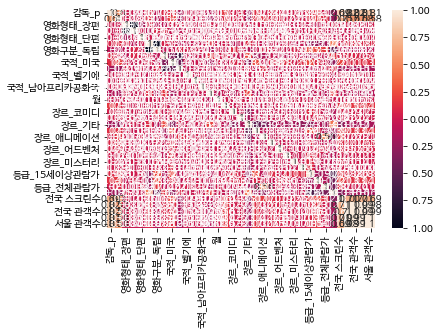

In [ ]:
sns.heatmap(df.corr(), annot = True)

#모델

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier

##자름

Index(['감독_p', '배급사_p', '영화형태_장편', '영화형태_옴니버스', '영화형태_단편', '영화구분_일반',
       '영화구분_독립', '국적_한국', '국적_미국', '국적_기타', '국적_벨기에', '국적_아이슬란드',
       '국적_남아프리카공화국', '연도', '월', '장르_사극', '장르_코미디', '장르_판타지', '장르_기타', '장르_액션',
       '장르_애니메이션', '장르_범죄', '장르_어드벤처', '장르_SF', '장르_미스터리', '장르_스릴러',
       '등급_15세이상관람가', '등급_12세이상관람가', '등급_전체관람가', '등급_청소년관람불가', '전국 스크린수',
       '전국 매출액', '전국 관객수', '서울 매출액', '서울 관객수'],
      dtype='object')

In [9]:
df_ex = df.copy()

In [10]:
df1 = df.drop(['영화형태_장편', '영화형태_옴니버스', '영화형태_단편'], axis = 1)

In [11]:
df1 = df.drop(['영화구분_일반', '영화구분_독립'], axis = 1)

In [12]:
df1 = df.drop(['연도', '월'], axis = 1)

In [13]:
df1 = df.drop(['국적_한국', '국적_미국', '국적_기타', '국적_벨기에', '국적_아이슬란드','국적_남아프리카공화국'], axis = 1)

In [14]:
df1 = df.drop(['등급_15세이상관람가', '등급_12세이상관람가', '등급_전체관람가', '등급_청소년관람불가'], axis = 1)

In [15]:
df1 = df.drop(['장르_사극', '장르_코미디', '장르_판타지', '장르_기타', '장르_액션',
       '장르_애니메이션', '장르_범죄', '장르_어드벤처', '장르_SF', '장르_미스터리', '장르_스릴러'], axis = 1)

In [16]:
#df = df_ex[['전국 관객수', '전국 스크린수']]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16692 entries, 0 to 16691
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   감독_p         16692 non-null  float64
 1   배급사_p        16692 non-null  float64
 2   영화형태_장편      16692 non-null  int64  
 3   영화형태_옴니버스    16692 non-null  int64  
 4   영화형태_단편      16692 non-null  int64  
 5   영화구분_일반      16692 non-null  int64  
 6   영화구분_독립      16692 non-null  int64  
 7   국적_한국        16692 non-null  int64  
 8   국적_미국        16692 non-null  int64  
 9   국적_기타        16692 non-null  int64  
 10  국적_벨기에       16692 non-null  int64  
 11  국적_아이슬란드     16692 non-null  int64  
 12  국적_남아프리카공화국  16692 non-null  int64  
 13  연도           16692 non-null  int64  
 14  월            16692 non-null  int64  
 15  장르_사극        16692 non-null  int64  
 16  장르_코미디       16692 non-null  int64  
 17  장르_판타지       16692 non-null  int64  
 18  장르_기타        16692 non-null  int64  
 19  장르_액

##추가 전처리

In [18]:
df.columns

Index(['감독_p', '배급사_p', '영화형태_장편', '영화형태_옴니버스', '영화형태_단편', '영화구분_일반',
       '영화구분_독립', '국적_한국', '국적_미국', '국적_기타', '국적_벨기에', '국적_아이슬란드',
       '국적_남아프리카공화국', '연도', '월', '장르_사극', '장르_코미디', '장르_판타지', '장르_기타', '장르_액션',
       '장르_애니메이션', '장르_범죄', '장르_어드벤처', '장르_SF', '장르_미스터리', '장르_스릴러',
       '등급_15세이상관람가', '등급_12세이상관람가', '등급_전체관람가', '등급_청소년관람불가', '전국 스크린수',
       '전국 매출액', '전국 관객수', '서울 매출액', '서울 관객수'],
      dtype='object')

In [19]:
df['가격'] = df['전국 매출액']/df['전국 관객수']

In [20]:
df['가격']

0        7706.985905
1        8585.826027
2        8028.632932
3        7779.589372
4        8768.300798
            ...     
16687    8000.000000
16688            NaN
16689            NaN
16690            NaN
16691            NaN
Name: 가격, Length: 16692, dtype: float64

In [21]:
df.tail()

,감독_p,배급사_p,영화형태_장편,영화형태_옴니버스,영화형태_단편,영화구분_일반,영화구분_독립,국적_한국,국적_미국,국적_기타,...,등급_15세이상관람가,등급_12세이상관람가,등급_전체관람가,등급_청소년관람불가,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,가격
16687,15.750000,12.791667,1,0,0,1,0,0,0,1,...,0,0,0,1,1,8000,1,0,0,8000.0
16688,0.000000,2.406313,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,NaN
16689,3230.142857,5026.260504,1,0,0,0,1,0,0,1,...,0,1,0,0,30,0,0,0,0,NaN
16690,0.000000,438.526316,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,NaN
16691,0.000000,438.526316,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,NaN


In [22]:
df['가격'] = df['가격'].fillna('0')

In [23]:
df['가격'] = df['가격'].astype('float')

##train/test/val

In [24]:
X = df.drop('전국 관객수', axis=1)
y = df['전국 관객수']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=42)

In [25]:
print(X_train.shape, X_test.shape, X_val.shape)

(10682, 35) (3339, 35) (2671, 35)


#X

## SimpleLinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df['전국 관객수'].describe()

count    1.669200e+04
mean     1.240477e+05
std      7.465775e+05
min      0.000000e+00
25%      1.000000e+00
50%      6.000000e+01
75%      3.516250e+03
max      1.761368e+07
Name: 전국 관객수, dtype: float64

In [ ]:
predict = df['전국 관객수'].mean()
errors = predict - df['전국 관객수']
errors

0       -1.748963e+07
1       -1.614090e+07
2       -1.428671e+07
3       -1.412195e+07
4       -1.381054e+07
             ...     
16687    1.240467e+05
16688    1.240477e+05
16689    1.240477e+05
16690    1.240477e+05
16691    1.240477e+05
Name: 전국 관객수, Length: 16692, dtype: float64

In [ ]:
mean_absolute_error = errors.abs().mean()
mean_absolute_error

219324.1208480866

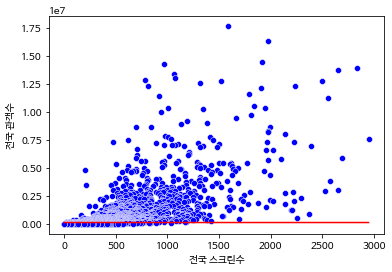

In [ ]:
x = df['전국 스크린수']
y = df['전국 관객수']

predict = df['전국 관객수'].mean()
errors = predict - df['전국 관객수']
mean_absolute_error = errors.abs().mean()

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');

In [ ]:
model = LinearRegression()

In [ ]:
print(f'예측 관객수 : {predict:,.0f}명')
print(f'절대평균에러 :  {mean_absolute_error:,.0f}명')

예측 관객수 : 124,048명
절대평균에러 :  219,324명


In [ ]:
top = df['전국 관객수'].sort_values(ascending=False)[:1000]

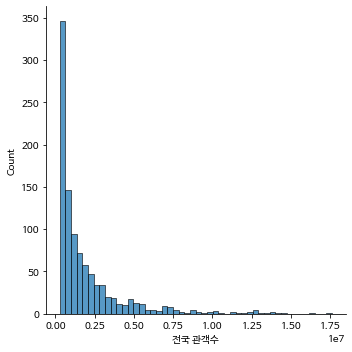

In [ ]:
sns.displot(top);

In [ ]:
feature = ['전국 스크린수']
target = ['전국 관객수']
X_train = df[feature]
y_train = df[target]

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test = [[x] for x in X_test['전국 스크린수']]
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([[-61828.12282652],
       [-19160.36437085],
       [-46108.42234285],
       ...,
       [-61828.12282652],
       [-61828.12282652],
       [-61828.12282652]])

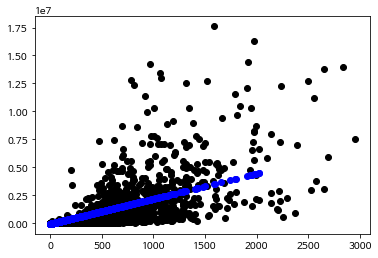

In [ ]:
plt.scatter(X_train_s, y_train_s, color='black', linewidth=1)

plt.scatter(X_test_s, y_pred_s, color='blue', linewidth=1);

In [ ]:
model.coef_

array([[2245.67149767]])

##MultipleLinearRegression

In [ ]:
train, test = train_test_split(df, train_size=0.8, random_state=42)

In [ ]:
features = ['전국 스크린수', '서울 관객수']
target = '전국 관객수'
X_train = train[features]
X_test = test[features]
y_train = train[target]
y_test = test[target]

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 24428.98


In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 27339.84


In [ ]:
model.intercept_, model.coef_

(-8039.891754173092, array([89.6090985 ,  3.70296874]))

##SelectKBest

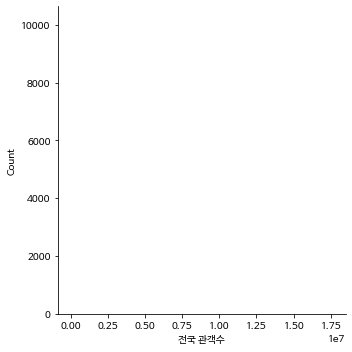

In [ ]:
#sns.displot(df['전국 관객수']);

In [ ]:
from sklearn.feature_selection import f_regression, SelectKBest

## selctor 정의합니다.
selector = SelectKBest(score_func=f_regression, k=7)

## 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(X_train, y_train)

## 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)


X_train_selected.shape, X_test_selected.shape

((10682, 7), (3339, 7))

In [ ]:
all_names = X_train.columns

## selector.get_support()
selected_mask = selector.get_support()

## 선택된 특성들
selected_names = all_names[selected_mask]

## 선택되지 않은 특성들
unselected_names = all_names[~selected_mask] 

print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['감독_p', '배급사_p', '장르_기타', '전국 스크린수', '전국 매출액', '서울 매출액', '서울 관객수'], dtype='object')
Unselected names:  Index(['영화형태_장편', '영화형태_옴니버스', '영화형태_단편', '영화구분_일반', '영화구분_독립', '국적_한국',
       '국적_미국', '국적_기타', '국적_벨기에', '국적_아이슬란드', '국적_남아프리카공화국', '연도', '월',
       '장르_사극', '장르_코미디', '장르_판타지', '장르_액션', '장르_애니메이션', '장르_범죄', '장르_어드벤처',
       '장르_SF', '장르_미스터리', '장르_스릴러', '등급_15세이상관람가', '등급_12세이상관람가', '등급_전체관람가',
       '등급_청소년관람불가', '가격'],
      dtype='object')


1 features
Selected names:  Index(['전국 매출액'], dtype='object')
Test MAE: $11,284
Test R2: 0.9936406265452766 

2 features
Selected names:  Index(['전국 매출액', '서울 관객수'], dtype='object')
Test MAE: $10,482
Test R2: 0.994056623657382 

3 features
Selected names:  Index(['전국 매출액', '서울 매출액', '서울 관객수'], dtype='object')
Test MAE: $3,156
Test R2: 0.9995172027775933 

4 features
Selected names:  Index(['감독_p', '전국 매출액', '서울 매출액', '서울 관객수'], dtype='object')
Test MAE: $3,222
Test R2: 0.999513718992069 

5 features
Selected names:  Index(['감독_p', '전국 스크린수', '전국 매출액', '서울 매출액', '서울 관객수'], dtype='object')
Test MAE: $3,322
Test R2: 0.9995100411508572 

6 features
Selected names:  Index(['감독_p', '배급사_p', '전국 스크린수', '전국 매출액', '서울 매출액', '서울 관객수'], dtype='object')
Test MAE: $3,328
Test R2: 0.9995124649354533 

7 features
Selected names:  Index(['감독_p', '배급사_p', '장르_기타', '전국 스크린수', '전국 매출액', '서울 매출액', '서울 관객수'], dtype='object')
Test MAE: $3,458
Test R2: 0.9995133793314516 

8 features
Selected names:  Index([

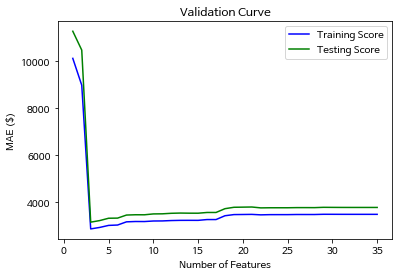

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

training = []
testing = []
ks = range(1, len(X_train.columns)+1)

# 1 부터 특성 수 만큼 사용한 모델을 만들어서 MAE 값을 비교 합니다.
for k in range(1, len(X_train.columns)+ 1):
    print(f'{k} features')
    
    selector = SelectKBest(score_func=f_regression, k=k)
    
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    all_names = X_train.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names: ', selected_names)

    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_test_selected)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    testing.append(mae)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2} \n')

plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label='Testing Score', color='g')
plt.ylabel("MAE ($)")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()


##DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=1, criterion='entropy')
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_val, y_val))

훈련 정확도:  1.0
검증 정확도:  0.5185323848745788


##Random Forests

In [ ]:
import tensorflow as tf

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    #SimpleImputer(), 
    RandomForestClassifier(random_state=42)
)
pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

In [ ]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    #SimpleImputer(), 
    RandomForestClassifier(random_state=42)
)
pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.3646574316735305


In [ ]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    #SimpleImputer(), 
    RandomForestClassifier(random_state=42)
)
pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.3680269561961812


In [160]:
pipe_1 = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=10, max_depth=None, oob_score=True)
)

pipe_1.fit(X_train, y_train)
print('검증 정확도', pipe_1.score(X_val, y_val))



/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


검증 정확도 0.5080494196929989


In [30]:
pipe_1 = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=10, max_depth=None, oob_score=True)
)

pipe_1.fit(X_train, y_train)
print('검증 정확도', pipe_1.score(X_val, y_val))


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


검증 정확도 0.510295769374766


In [31]:
pipe_1 = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=30, n_jobs=-1, random_state=10, max_depth=None, oob_score=True)
)

pipe_1.fit(X_train, y_train)
print('검증 정확도', pipe_1.score(X_val, y_val))

검증 정확도 0.5121677274429053


In [35]:
#y_pred = pipe_1.predict(X_test)
#print('테스트 셋', pipe_1.score(y_test, y_pred))

ValueError: ignored